# Load libraries

In [2]:
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from IPython import display
#path to figures
figPath='./code_figures/'
print('Finished loading libs')

Finished loading libs


## Reading data

In [4]:
fileName='CarPrice_Assignment.csv'
inputDf=pd.read_csv(fileName, sep=',')

#data dimension
print('\nData shape:')
print(inputDf.shape)

#data columns
print('\nData columns:')
print(inputDf.columns)

#data head
print('\nData head:')
print(inputDf.head())


Data shape:
(205, 26)

Data columns:
Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Data head:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  .

In [3]:
#data types
inputDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data summary statistics

In [4]:
#get data summary stats
inputDf.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
#checking for any mssing values, NA, weird symbols
inputDf.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# 1st Regression analysis

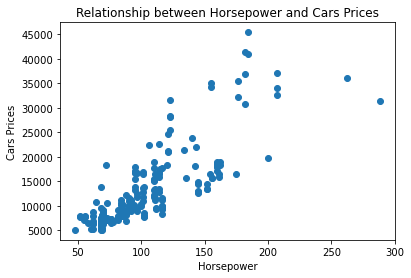

In [14]:
plt.scatter(inputDf.horsepower, inputDf.price)
plt.xlabel("Horsepower")
plt.ylabel("Cars Prices")
plt.title("Relationship between Horsepower and Cars Prices")
plt.show()

## Subset dataset

In [15]:
numObs=6# Obs is observations/instances
print('Num of observations selected:', numObs, '\n\n')
#let X be the horsepower
X=inputDf.horsepower[0:numObs]
#let Y be the car price
Y=inputDf.price[0:numObs]
print('X is\n:', X)
print('\nY is\n:', Y)

Num of observations selected: 6 


X is
: 0    111
1    111
2    154
3    102
4    115
5    110
Name: horsepower, dtype: int64

Y is
: 0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
5    15250.0
Name: price, dtype: float64


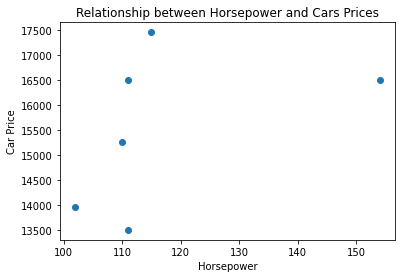

In [16]:
#plot the subset data set
plt.scatter(X, Y)
plt.xlabel("Horsepower")
plt.ylabel("Car Price")
plt.title("Relationship between Horsepower and Cars Prices")
plt.show()

-I'm trying to find a line which fits the data.

Modeling the data mathematically:
I'll model Cars Prices as a linear function of Horsepower. This step is called model selection: you selected a linear model of Cars Prices with just one attribute which is the Horsepower.

cars_prices= m * horsepower + b

<b>We find the line which fits the data best, by changing the m & b variables (coefficients)</b>

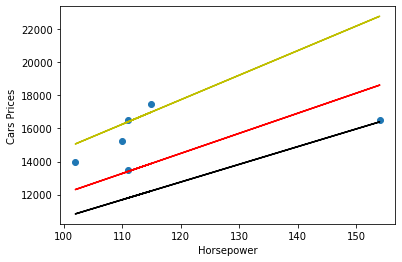

In [18]:
#Let us try different values of m and let us fix b
#set b to -100
b=-100

#the X and Y points
plt.scatter(X, Y)

#Line 1; red line
m=121.576
plt.plot(X, b + m * X, color='r')

#Line 2; yellow line
m=148.64
plt.plot(X, b + m * X, color='y')

#Line 3; black line
m=107.142

plt.plot(X, b + m * X, color='k')

#add x and y labels and show plot
plt.xlabel("Horsepower")
plt.ylabel("Cars Prices")
plt.show()

# Linear regression using scikit-learn

In [19]:
#global
numPoints=6
print('Num of points:', numPoints)

Num of points: 6


In [20]:
#select the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [21]:
#set and select the training data
#set the X
type( inputDf.horsepower )
X=inputDf.horsepower
print( type(X) )
X=X.values.reshape(-1, 1)
print( type(X) )
print( X[:numPoints] )
#print(X)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[[111]
 [111]
 [154]
 [102]
 [115]
 [110]]


In [22]:
#set the Y
Y=inputDf.price
type(Y)

pandas.core.series.Series

In [23]:
#call the function
lm.fit(X, Y)

LinearRegression()

In [24]:
#check output
lm.coef_

array([163.26306097])

In [25]:
lm.intercept_

-3721.76149432276

y=m*x+b <br>
cars_prices= 163.26 * horsepower - 3721.761 <br>

In [26]:
#what are the predcited values for the first 6 points
lm.predict(X)[0:numPoints]

array([14400.43827331, 14400.43827331, 21420.749895  , 12931.07072458,
       15053.49051719, 14237.17521234])

In [27]:
#what are the actual prices
Y[0:numPoints]

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
5    15250.0
Name: price, dtype: float64

In [28]:
df = pd.DataFrame({'Actual': Y[0:numPoints], 'Predicted': lm.predict(X)[0:numPoints]})
df

,Actual,Predicted
0,13495.0,14400.438273
1,16500.0,14400.438273
2,16500.0,21420.749895
3,13950.0,12931.070725
4,17450.0,15053.490517
5,15250.0,14237.175212


carIds: [1, 2, 3, 4, 5, 6]


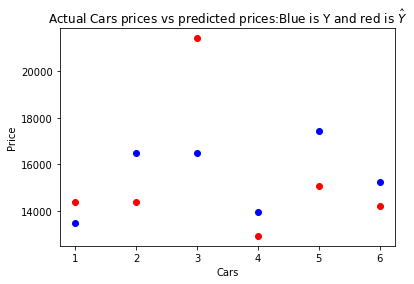

In [29]:
carIds=list( range(1,numPoints+1) )
print('carIds:', carIds)
#plot the actual price in blue
plt.scatter(carIds,inputDf.price[0:numPoints],color='blue')
#plot the predicted price in red
plt.scatter(carIds,lm.predict(X)[0:numPoints],color= 'red')
plt.xlabel("Cars")
plt.ylabel("Price")
plt.title("Actual Cars prices vs predicted prices:Blue is Y and red is $\\hat{Y}$")
plt.show()

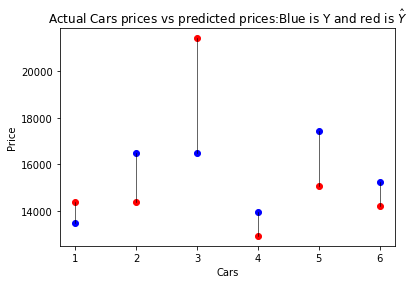

In [30]:
carIds=list( range(1,numPoints+1) )

fig, axs = plt.subplots(ncols=1, nrows=1)
for i in range(len(carIds)):
    axs.plot([i+1,i+1],[lm.predict(X)[i], inputDf.price[i]], c="k", linewidth=0.6)

plt.scatter(carIds,inputDf.price[0:numPoints],color='blue')
plt.scatter(carIds,lm.predict(X)[0:numPoints],color= 'red')
plt.xlabel("Cars")
plt.ylabel("Price")
plt.title("Actual Cars prices vs predicted prices:Blue is Y and red is $\\hat{Y}$")
plt.show()

# Training and testing

In [31]:
#pick the training and testing data manually to see how well the model perf
#pick the training data
X_train = X[:-50]
Y_train = inputDf.price[:-50]

#pick the testing data
X_test = X[-50:]
Y_test = inputDf.price[-50:]
print (X_train.shape)
print (Y_train.shape)

print (X_test.shape)
print (Y_test.shape)

(155, 1)
(155,)
(50, 1)
(50,)


In [32]:
#call linear regression
lm = LinearRegression()
lm.fit(X_train, Y_train)
print('Finsihed fitting model')

Finsihed fitting model


In [33]:
#test
pred_price_test = lm.predict(X_test)
print('Finsihed testing')

Finsihed testing


In [34]:
#see how well your model predicted cars prices using your test data
df = pd.DataFrame({'Actual': Y_test, 'Predicted': pred_price_test})
df.head()
#df.shape

,Actual,Predicted
155,8778.0,6124.964318
156,6938.0,7522.484722
157,7198.0,7522.484722
158,7898.0,5076.824016
159,7788.0,5076.824016


In [35]:
from sklearn.metrics import r2_score
r2_score(Y_test, pred_price_test)

0.16659843819339126

In [36]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred_price_test))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred_price_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred_price_test)))

Mean Absolute Error: 3154.129941215846
Mean Squared Error: 15380493.158320194
Root Mean Squared Error: 3921.797184750914


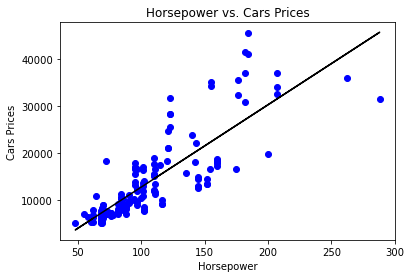

In [37]:
plt.scatter(X_train, Y_train, color = 'blue')
plt.plot(X_train, lm.predict(X_train), color = 'black')
plt.title('Horsepower vs. Cars Prices')
plt.xlabel('Horsepower')
plt.ylabel('Cars Prices')
plt.show()

# 2nd Regression analysis

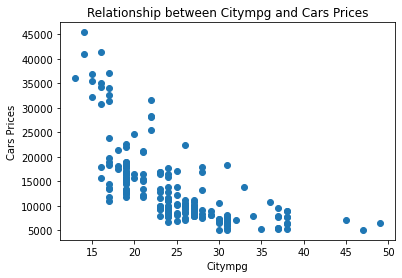

In [38]:
plt.scatter(inputDf.citympg, inputDf.price)
plt.xlabel("Citympg")
plt.ylabel("Cars Prices")
plt.title("Relationship between Citympg and Cars Prices")
plt.show()

In [39]:
numObs=6# Obs is observations/instances
print('Num of observations selected:', numObs, '\n\n')
#let X be the Citympg
X=inputDf.citympg[0:numObs]
#let Y be the car price
Y=inputDf.price[0:numObs]
print('X is\n:', X)
print('\nY is\n:', Y)

Num of observations selected: 6 


X is
: 0    21
1    21
2    19
3    24
4    18
5    19
Name: citympg, dtype: int64

Y is
: 0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
5    15250.0
Name: price, dtype: float64


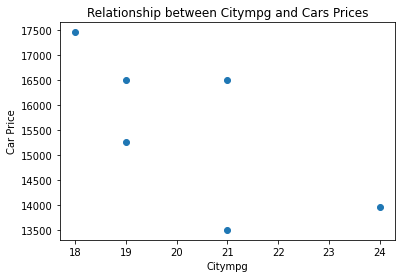

In [40]:
#plot the subset data set
plt.scatter(X, Y)
plt.xlabel("Citympg")
plt.ylabel("Car Price")
plt.title("Relationship between Citympg and Cars Prices")
plt.show()

I'll model Cars Prices as a linear function of Citympg. This step is called model selection: you selected a linear model of Cars Prices with just one attribute which is the Citympg.

cars_prices= m * citympg + b

<b>We find the line which fits the data best, by changing the m & b variables (coefficients)</b>

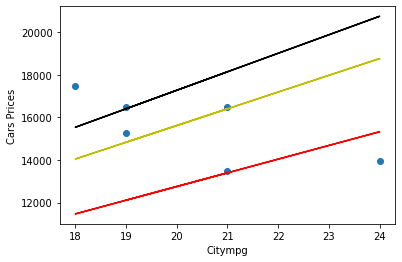

In [41]:
#Let us try different values of m and let us fix b
#set b to -100
b=-100

#the X and Y points
plt.scatter(X, Y)

#Line 1; red line
m=642.619
plt.plot(X, b + m * X, color='r')

#Line 2; yellow line
m=785.71
plt.plot(X, b + m * X, color='y')

#Line 3; black line
m=868.42
plt.plot(X, b + m * X, color='k')

#add x and y labels and show plot
plt.xlabel("Citympg")
plt.ylabel("Cars Prices")
plt.show()

In [42]:
#global
numPoints=6
print('Num of points:', numPoints)

Num of points: 6


In [43]:
#select the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [44]:
#set and select the training data
#set the X
type( inputDf.citympg )
X=inputDf.citympg
print( type(X) )
X=X.values.reshape(-1, 1)
print( type(X) )
print( X[:numPoints] )
#print(X)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[[21]
 [21]
 [19]
 [24]
 [18]
 [19]]


In [45]:
#set the Y
Y=inputDf.price
type(Y)

pandas.core.series.Series

In [46]:
#call the function
lm.fit(X, Y)

LinearRegression()

In [47]:
#check output
lm.coef_

array([-837.39644453])

In [48]:
lm.intercept_

34395.44041563233

y=m*x+b <br>
cars_prices= -837.396 * citympg + 34395.440 <br>

In [49]:
#what are the predcited values for the first 6 points
lm.predict(X)[0:numPoints]

array([16810.11508057, 16810.11508057, 18484.90796962, 14297.92574698,
       19322.30441415, 18484.90796962])

In [50]:
#what are the actual prices
Y[0:numPoints]

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
5    15250.0
Name: price, dtype: float64

In [51]:
df = pd.DataFrame({'Actual': Y[0:numPoints], 'Predicted': lm.predict(X)[0:numPoints]})
df

,Actual,Predicted
0,13495.0,16810.115081
1,16500.0,16810.115081
2,16500.0,18484.907970
3,13950.0,14297.925747
4,17450.0,19322.304414
5,15250.0,18484.907970


carIds: [1, 2, 3, 4, 5, 6]


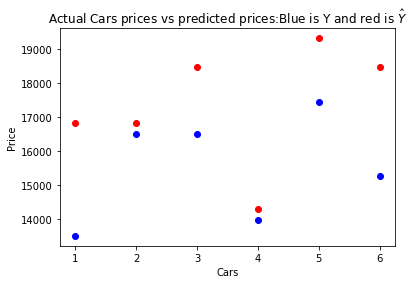

In [52]:
carIds=list( range(1,numPoints+1) )
print('carIds:', carIds)
#plot the actual price in blue
plt.scatter(carIds,inputDf.price[0:numPoints],color='blue')
#plot the predicted price in red
plt.scatter(carIds,lm.predict(X)[0:numPoints],color= 'red')
plt.xlabel("Cars")
plt.ylabel("Price")
plt.title("Actual Cars prices vs predicted prices:Blue is Y and red is $\\hat{Y}$")
plt.show()

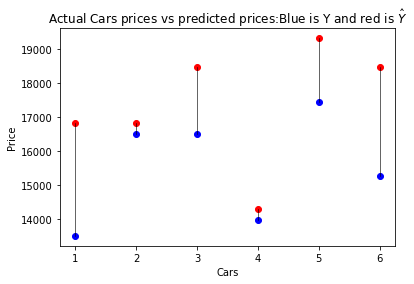

In [53]:
carIds=list( range(1,numPoints+1) )

fig, axs = plt.subplots(ncols=1, nrows=1)
for i in range(len(carIds)):
    axs.plot([i+1,i+1],[lm.predict(X)[i], inputDf.price[i]], c="k", linewidth=0.6)

plt.scatter(carIds,inputDf.price[0:numPoints],color='blue')
plt.scatter(carIds,lm.predict(X)[0:numPoints],color= 'red')
plt.xlabel("Cars")
plt.ylabel("Price")
plt.title("Actual Cars prices vs predicted prices:Blue is Y and red is $\\hat{Y}$")
plt.show()

In [54]:
#pick the training and testing data manually to see how well the model perf
#pick the training data
X_train = X[:-50]
Y_train = inputDf.price[:-50]

#pick the testing data
X_test = X[-50:]
Y_test = inputDf.price[-50:]
print (X_train.shape)
print (Y_train.shape)

print (X_test.shape)
print (Y_test.shape)

(155, 1)
(155,)
(50, 1)
(50,)


In [55]:
#call linear regression
lm = LinearRegression()
lm.fit(X_train, Y_train)
print('Finsihed fitting model')

Finsihed fitting model


In [56]:
#test
pred_price_test = lm.predict(X_test)
print('Finsihed testing')

Finsihed testing


In [57]:
#see how well your model predicted cars prices using your test data
df = pd.DataFrame({'Actual': Y_test, 'Predicted': pred_price_test})
df.head()
#df.shape

,Actual,Predicted
155,8778.0,11851.974264
156,6938.0,9177.714870
157,7198.0,9177.714870
158,7898.0,5612.035679
159,7788.0,2046.356487


In [58]:
from sklearn.metrics import r2_score
r2_score(Y_test, pred_price_test)

0.2747038390477571

In [59]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred_price_test))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred_price_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred_price_test)))

Mean Absolute Error: 3149.56910237876
Mean Squared Error: 13385399.251112146
Root Mean Squared Error: 3658.606189672803


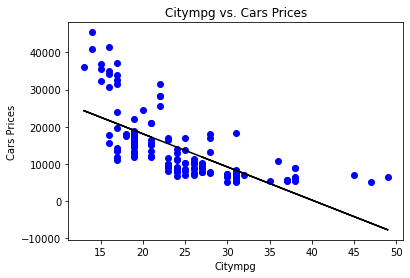

In [60]:
plt.scatter(X_train, Y_train, color = 'blue')
plt.plot(X_train, lm.predict(X_train), color = 'black')
plt.title('Citympg vs. Cars Prices')
plt.xlabel('Citympg')
plt.ylabel('Cars Prices')
plt.show()

<b> Which variable (feature) better explains the car price? How did you reach that conclusion?

I found that the horsepower variable (feature) better explains the car price because generally when the horsepower increases the car price increases as well, we have a positive relationship.
On the other hand, I found that whenever the Citympg variable (feature) increases the car price decrease which makes it a negative relationship.</b>
